# **Logistic Regression Model**

**Option 1 [Challenging]**


---



*   Use the tips dataset and apply a logistic regression model to the tips dataset. Bin a continuous variable (tips column into 3 different categories).
*   Your 3 categories for your continuous variable will be:
    * Bad Tipper
    * Good Tipper
    * Excellent Tipper
*   Also, create a linear regression that predicts the tips column as well.
*   Compare your results from the linear and logistic regression using the following criteria:
    * If your predicted regression is exceeding 10% tolerance (error) then consider it a false prediction, otherwise, it is true.
    * Example: If the actual value is $1 and your prediction is [0.9, 1.10] this is true, otherwise it is false.
    * Compare the false prediction between your classification and regression models and see which one performed better.

The Tips dataset is a data frame with 244 rows and 7 variables.

variables: 
* **tip** in dollars 
* **bill** in dollars
* **sex**of the bill payer
* whether there were **smokers** in the party
* **day** of the week
* **time** of day 
* **size**of the party

In [198]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [158]:
df_assg = sns.load_dataset("tips")
df_assg.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [159]:
df_assg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [160]:
df_assg.shape

(244, 7)

In [161]:
df_assg.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Check if there are missing data!

In [162]:
df_assg.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

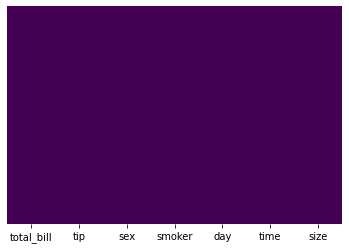

In [163]:
sns.heatmap(df_assg.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [165]:
for i in df_assg.columns:
    print(df_assg[i].unique())

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10.59 10.63 50.8

**Visualization**

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

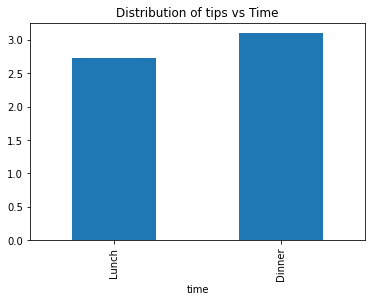

In [166]:
df_assg.groupby(['time'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs Time')
df_assg.groupby(['time'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

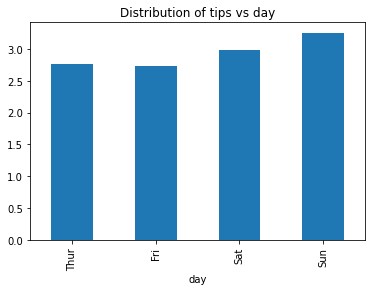

In [167]:
df_assg.groupby(['day'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs day')
df_assg.groupby(['day'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

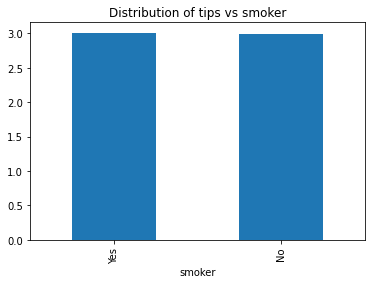

In [168]:
df_assg.groupby(['smoker'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs smoker')
df_assg.groupby(['smoker'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

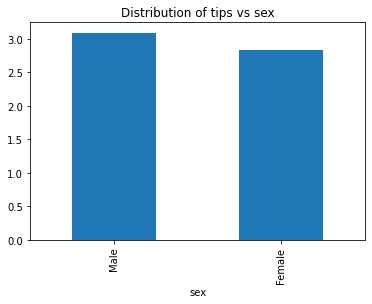

In [169]:
df_assg.groupby(['sex'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs sex')
df_assg.groupby(['sex'])['tip'].mean()

In [170]:
def binningFunction(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  print(break_points)
  if not labels:
   lables =range(len(cut_points)+1)
  colBin = pd.cut(col, bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [171]:
cut_points = [4.0, 7.0];
labels = ["Bad_Tipper","Good_Tipper","Excellent_Tipper"]
df_assg["Tipper"] = binningFunction(df_assg["tip"], cut_points, labels)
df_assg

[1.0, 4.0, 7.0, 10.0]


,total_bill,tip,sex,smoker,day,time,size,Tipper
0,16.99,1.01,Female,No,Sun,Dinner,2,Bad_Tipper
1,10.34,1.66,Male,No,Sun,Dinner,3,Bad_Tipper
2,21.01,3.50,Male,No,Sun,Dinner,3,Bad_Tipper
3,23.68,3.31,Male,No,Sun,Dinner,2,Bad_Tipper
4,24.59,3.61,Female,No,Sun,Dinner,4,Bad_Tipper
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Good_Tipper
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Bad_Tipper
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Bad_Tipper
242,17.82,1.75,Male,No,Sat,Dinner,2,Bad_Tipper


In [172]:
df_assg.drop('tip',axis=1,inplace=True)

In [173]:
df_assg.head()

,total_bill,sex,smoker,day,time,size,Tipper
0,16.99,Female,No,Sun,Dinner,2,Bad_Tipper
1,10.34,Male,No,Sun,Dinner,3,Bad_Tipper
2,21.01,Male,No,Sun,Dinner,3,Bad_Tipper
3,23.68,Male,No,Sun,Dinner,2,Bad_Tipper
4,24.59,Female,No,Sun,Dinner,4,Bad_Tipper


* Bad_Tipper         frome 0.0 to 0.4
* Good_Tipper        frome 0.4 to 0.7  
* Excellent_Tipper   frome 0.7 to 0.10   

In [175]:
df_assg.Tipper.value_counts()

Bad_Tipper          203
Good_Tipper          38
Excellent_Tipper      3
Name: Tipper, dtype: int64

Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

1. ['Male', 'Female']  -> delete a male column and can understand if he is a male when the column female in 0.
2. ['Thur', 'Fri', 'Sat', 'Sun'] -> delete a Thur column and can understand when it's a Thurday come the other columns will be all 0.
3. ['Lunch', 'Dinner'] -> delete a Lunch column and can understand if it's a Lunch when the Dinner column is 0. **bold text**

In [176]:
sex = pd.get_dummies(df_assg['sex'],drop_first=True)
day = pd.get_dummies(df_assg['day'],drop_first=True)
time = pd.get_dummies(df_assg['time'],drop_first=True)

In [177]:
df_assg.drop(['sex','smoker','day','time'],axis=1,inplace=True)

In [178]:
df_assg = pd.concat([df_assg,sex,day,time],axis=1)

In [179]:
df_assg.head()

,total_bill,size,Tipper,Female,Fri,Sat,Sun,Dinner
0,16.99,2,Bad_Tipper,1,0,0,1,1
1,10.34,3,Bad_Tipper,0,0,0,1,1
2,21.01,3,Bad_Tipper,0,0,0,1,1
3,23.68,2,Bad_Tipper,0,0,0,1,1
4,24.59,4,Bad_Tipper,1,0,0,1,1


In [184]:
corr = df_assg.corr()
corr.style.background_gradient(cmap='Blues')

,total_bill,size,Female,Fri,Sat,Sun,Dinner
total_bill,1.000000,0.598315,-0.144877,-0.086168,0.054919,0.122953,0.183118
size,0.598315,1.000000,-0.086195,-0.142184,-0.041121,0.193054,0.103411
Female,-0.144877,-0.086195,1.000000,0.071060,-0.053957,-0.168106,-0.205231
Fri,-0.086168,-0.142184,0.071060,1.000000,-0.216319,-0.195451,-0.058159
Sat,0.054919,-0.041121,-0.053957,-0.216319,1.000000,-0.500682,0.462709
Sun,0.122953,0.193054,-0.168106,-0.195451,-0.500682,1.000000,0.418071
Dinner,0.183118,0.103411,-0.205231,-0.058159,0.462709,0.418071,1.000000


# **Train data**

In [180]:
X= df_assg.drop("Tipper", axis=1)
y= df_assg['Tipper']

In [181]:
X

,total_bill,size,Female,Fri,Sat,Sun,Dinner
0,16.99,2,1,0,0,1,1
1,10.34,3,0,0,0,1,1
2,21.01,3,0,0,0,1,1
3,23.68,2,0,0,0,1,1
4,24.59,4,1,0,0,1,1
...,...,...,...,...,...,...,...
239,29.03,3,0,0,1,0,1
240,27.18,2,1,0,1,0,1
241,22.67,2,0,0,1,0,1
242,17.82,2,0,0,1,0,1


In [182]:
y

0       Bad_Tipper
1       Bad_Tipper
2       Bad_Tipper
3       Bad_Tipper
4       Bad_Tipper
          ...     
239    Good_Tipper
240     Bad_Tipper
241     Bad_Tipper
242     Bad_Tipper
243     Bad_Tipper
Name: Tipper, Length: 244, dtype: category
Categories (3, object): ['Bad_Tipper' < 'Good_Tipper' < 'Excellent_Tipper']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [186]:
classifierlog = LogisticRegression(random_state = 0)
classifierlog.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [187]:
y_pred = classifierlog.predict(X_test)

print(y_pred)

['Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Good_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Good_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Good_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Good_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Good_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Good_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper'
 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper' 'Bad_Tipper']


In [194]:
test_dataset = pd.DataFrame(X_test, columns= ['total_bill',	'size',	'Female',	'Fri','Sat','Sun','Dinner'])

test_dataset['Actual_Tipper'] = y_test.to_numpy()
test_dataset['Predict_Tipper'] = y_pred

test_dataset

,total_bill,size,Female,Fri,Sat,Sun,Dinner,Actual_Tipper,Predict_Tipper
64,17.59,3,0,0,1,0,1,Bad_Tipper,Bad_Tipper
63,18.29,4,0,0,1,0,1,Bad_Tipper,Bad_Tipper
55,19.49,2,0,0,0,1,1,Bad_Tipper,Bad_Tipper
111,7.25,1,1,0,1,0,1,Bad_Tipper,Bad_Tipper
225,16.27,2,1,1,0,0,0,Bad_Tipper,Bad_Tipper
...,...,...,...,...,...,...,...,...,...
90,28.97,2,0,1,0,0,1,Bad_Tipper,Bad_Tipper
101,15.38,2,1,1,0,0,1,Bad_Tipper,Bad_Tipper
75,10.51,2,0,0,1,0,1,Bad_Tipper,Bad_Tipper
4,24.59,4,1,0,0,1,1,Bad_Tipper,Bad_Tipper


In [195]:
(test_dataset['Actual_Tipper'] == test_dataset['Predict_Tipper']).value_counts()

True     62
False    12
dtype: int64

**Confusion Matrix**

In [196]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[59,  0,  2],
       [ 0,  0,  1],
       [ 9,  0,  3]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


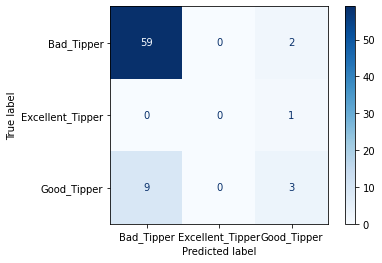

In [197]:
plot_confusion_matrix(classifierlog, X=X_test, y_true=y_test, cmap='Blues')

In [199]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

      Bad_Tipper       0.87      0.97      0.91        61
Excellent_Tipper       0.00      0.00      0.00         1
     Good_Tipper       0.50      0.25      0.33        12

        accuracy                           0.84        74
       macro avg       0.46      0.41      0.42        74
    weighted avg       0.80      0.84      0.81        74



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
accuracy_score(y_test, y_pred)

0.8378378378378378

**what I concluded, I think that the logistic regression gave a better result than the linear regression**